<a href="https://colab.research.google.com/github/komazawa-deep-learning/komazawa-deep-learning.github.io/blob/master/2025notebooks/2025_0421eigenfaces_vs_fisherfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第4回Pythonで実践する深層学習勉強会

<center>
浅川伸一 __asakawa@ieee.org__
</center>

# 固有顔とフィッシャー顔

## 文献
1. Turk and Pentland (1991)
2. Belhumeur, Hespanha and Kriegman (1997)

参考
[Linear Discriminant Analysis -Bit by Bit](http://sebastianraschka.com/Articles/2014_python_lda.html)

- 固有顔 [PCA 主成分分析](https://en.wikipedia.org/wiki/Principal_component_analysis)ベース
- フィッシャー顔 [LDA 線形判別分析](https://en.wikipedia.org/wiki/Linear_discriminant_analysis)ベース

この場合 LDA: <font color="blue">Linear Discriminant Analysis</font> であって <font color="blue">Latent Dirichlet Allocation</font> ではないことに注意

統計学の知識のある方であれば，同様の考え方をすれば ICA 顔，NMF 顔，なども考えられるし実際に提案されている。ただし，今回は触れない。

[scikit-learn](face_recognition.ipynb)の固有顔のデモは LFW 日常的な画像に人物ラベルを付けたデータセットを用いてPCAを実行し，識別に SVM を用いるものであった。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [20]:
lfw_people = fetch_lfw_people() #min_faces_per_person=70, resize=0.4)
#lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 13233
n_features: 2914
n_classes: 5749


In [21]:
#print(dir(lfw_people))
print(lfw_people.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenCV li

In [7]:
#from sklearn.model_selection import train_test_split
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

In [33]:
np.unique(lfw_people.target_names).shape
lfw_people.images.shape

(13233, 62, 47)

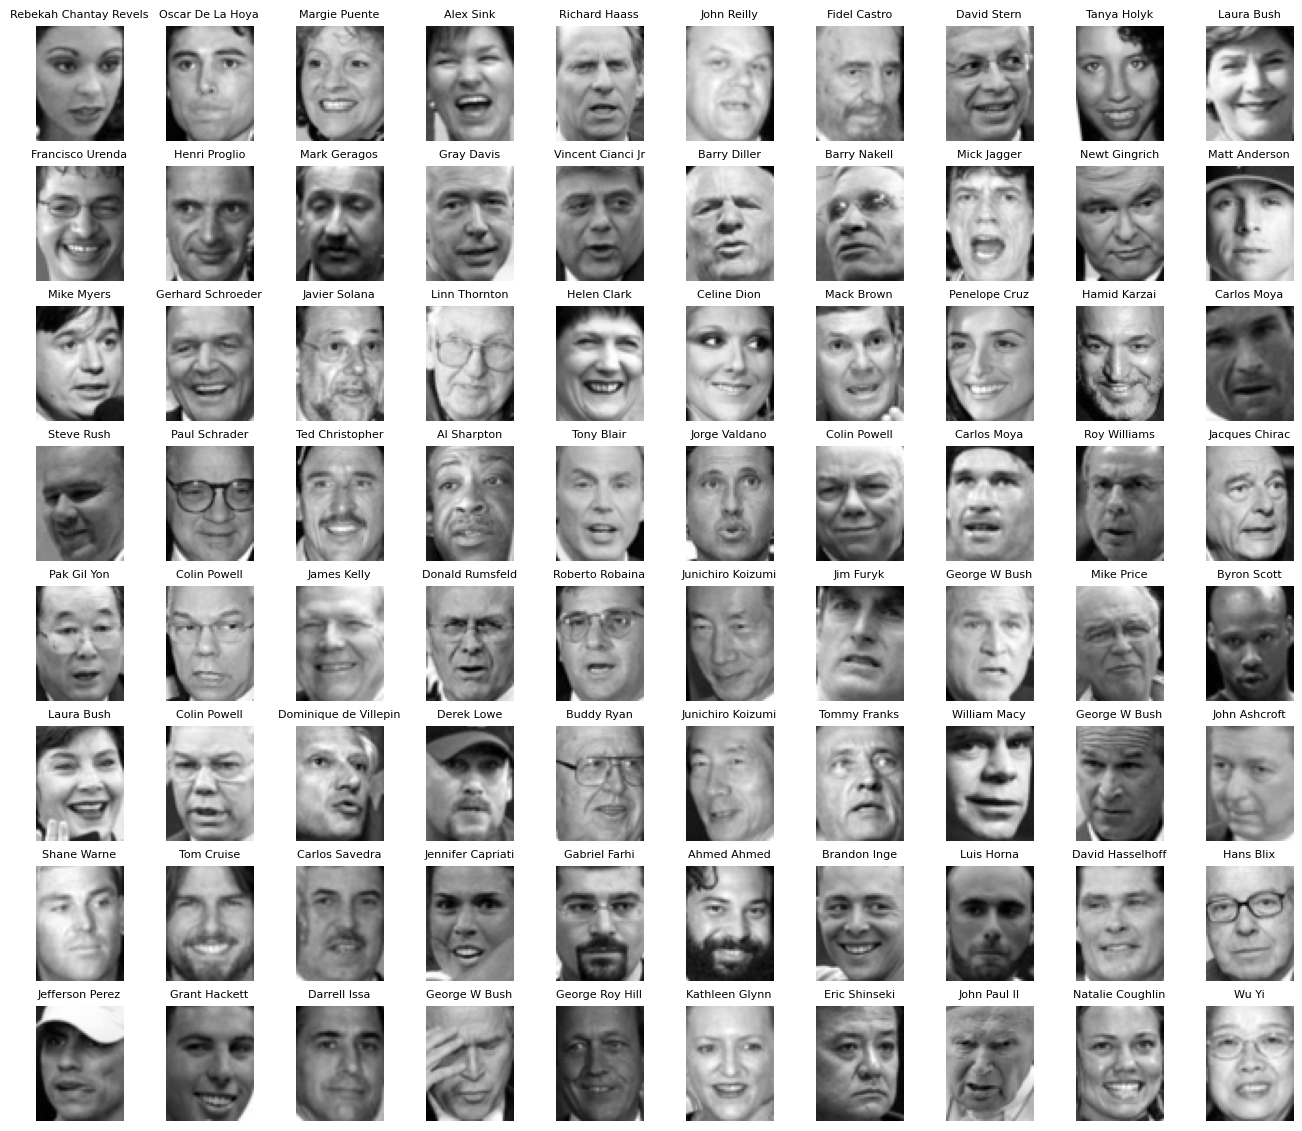

In [54]:
import matplotlib.pyplot as plt
lfw_people = fetch_lfw_people() #min_faces_per_person=70, resize=0.4)

nrows = 8
ncols = 10
fig, fig_axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols * 1.3, nrows * 1.4), constrained_layout=True)
for i in range(nrows):
    for j in range(ncols):
        x = i * 10 + j + 500
        fig_axes[i][j].imshow(lfw_people.images[x], cmap='gray')
        fig_axes[i][j].axis('off')
        _idx = lfw_people.target[x]
        fig_axes[i][j].set_title(f'{lfw_people.target_names[_idx]}', fontsize=8)

[np.str_('Hugo Chavez'), np.str_('Ariel Sharon'), np.str_('Junichiro Koizumi')]


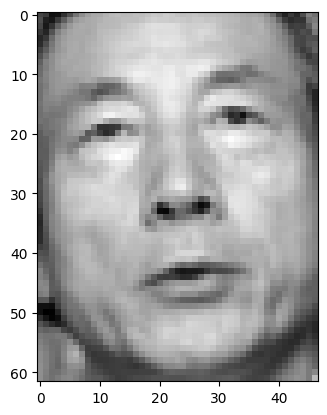

In [52]:
plt.imshow(lfw_people.data[-1].reshape(62,47), cmap='gray')
print([lfw_people.target_names[idx] for idx in lfw_people.target[-3:]])


In [8]:
num_features = n_components = 150
num_features = n_components = 5

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))
print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Extracting the top 5 eigenfaces from 1159 faces
Projecting the input data on the eigenfaces orthonormal basis


In [ ]:
import tensorflow as tf

# resets the graph, needed when initializing weights multiple times, like in this notebook
#reset_default_graph()

# Setting up placeholder, this is where your data enters the graph!
x_pl = tf.placeholder(tf.float32, [None, num_features])

# defining our initializer for our weigths from a normal distribution (mean=0, std=0.1)
weight_initializer = tf.truncated_normal_initializer(stddev=0.1)
with tf.variable_scope('l_1'): # if you run it more than once, reuse has to be True
    W_1 = tf.get_variable('W', [num_features, num_output], # change num_output to 100 for mlp
                          initializer=weight_initializer)
    b_1 = tf.get_variable('b', [num_output], # change num_output to 100 for mlp
                          initializer=tf.constant_initializer(0.0))
with tf. variable_scope('l_2'):
    W_2 = tf.get_variable('W', [100, num_output],
                          initializer=weight_initializer)
    b_2 = tf.get_variable('b', [num_output],
                          initializer=tf.constant_initializer(0.0))

# Setting up ops, these ops will define edges along our computational graph
# The below ops will compute a logistic regression, but can be modified to
# compute a neural network

l_1 = tf.matmul(x_pl, W_1) + b_1
# to make a hidden layer we need a nonlinearity
# l_1_nonlinear = tf.nn.relu(l_1)
# the layer before the softmax should not have a nonlinearity
# l_2 = tf.matmul(l_1_nonlinear, W_2) + b_2
y = tf.nn.softmax(l_1) # change to l_2 for MLP


# y_ is a placeholder variable taking on the value of the target batch.
y_ = tf.placeholder(tf.float32, [None, num_output])

# computing cross entropy per sample
cross_entropy = -tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1])

# averaging over samples
cross_entropy = tf.reduce_mean(cross_entropy)

# Write the graph so we can look at it in TensorBoard
# Now is a good time to try that
# https://www.tensorflow.org/versions/r0.10/how_tos/summaries_and_tensorboard/index.html
sw = tf.train.SummaryWriter('.', graph=tf.get_default_graph())

# Create a placeholder we'll use later to feed the correct y value into the graph
y_label = tf.placeholder(shape=[None], dtype=tf.float32, name='y_label')
print(y_label)


# Build training graph.
# Create an operation that calculates loss.
loss = tf.reduce_mean(tf.square(y - y_label))

# Create an optimizer.
optimizer = tf.train.GradientDescentOptimizer(0.5)

# Create an operation that minimizes loss.
train = optimizer.minimize(loss)

print("loss:", loss)
print("optimizer:", optimizer)
print("train:", train)

# Create an operation to initialize all the variables.
init = tf.initialize_all_variables()
print(init)

# Create a session and launch the graph.
sess = tf.Session()
sess.run(init)
print(sess.run([W, b]))

# Calculate accuracy on the evaluation data before training
def eval():
    return sess.run(loss, feed_dict={x: x_eval, y_label: y_eval})
eval()

# using the graph to print ops
print("operations")
operations = [op.name for op in tf.get_default_graph().get_operations()]
print(operations)
print

# variables are accessed through tensorflow
print("variables")
variables = [var.name for var in tf.all_variables()]
print(variables)



# Buld inference graph.
# Create Variables W and b that compute y_data = W * x_data + b
W = tf.get_variable(shape=[], name='weights')
b = tf.get_variable(shape=[], name='bias')

# Uncomment the following lines to see W and b are.
print(W)
print(b)

AttributeError: module 'tensorflow' has no attribute 'placeholder'

---
## 文献

### 1.
title={Eigenfaces for Recognition},<br>
author={Matthew Turk and Alex Pentland},<br>
year={1991},<br>
journal={Journal of Cognitive Neuroscience},<br>
volume={3},<br>
number={1},<br>
pages={71-86},<br>
abstract={We have developed a near-real-time computer system that can locate and track a subject's head, and then recognize the person by comparing characteristics of the face to those of known individuals. The computational approach taken in this system is motivated by both physiology and information theory, as well as by the practical requirements of near-real-time performance and accuracy. Our approach treats the face recognition problem as an intrinsically two-dimensional (2-0) recognition problem rather than requiring recovery of threedimensional geometry, taking advantage of the fact that faces are normally upright and thus may be described by a small set of 2-0 characteristic views. The system functions by projecting face images onto a feature space that spans the significant variations among known face images. The significant features are known as "eigenfaces," because they are the eigenvectors (principal components) of the set of faces; they do not necessarily correspond to features such as eyes, ears, and noses. The projection operation characterizes an individual face by a weighted sum of the eigenface features, and so to recognize a particular face it is necessary only to compare these weights to those of known individuals. Some particular advantages of our approach are that it provides for the ability to learn and later recognize new faces in an unsupervised manner, and that it is easv to implement using a neural network 'architecture.},

### 2.
title={Eigenfaces vs. Fisherfaces: Recognition Using Class Specific Linear Projection},<br>
author={Peter N. Belhumeur and Jo\~{a}o P. Hespanha and David J. Kriegman},<br>
year={1997},<br>
journal={{IEEE} Transactions on Pattern Analysis and Machine Intelligence},<br>
volume={19},<br>
number={7},<br>
pages={711-720},<br>
abstract={We develop a face recognition algorithm which is insensitive to large variation in lighting direction and facial expression. Taking a pattern classification approach, we consider each pixel in an image as a coordinate in a high-dimensional space. We take advantage of the observation that the images of a particular face, under varying illumination but fixed pose, lie in a 3D linear subspace of the high dimensional image space—if the face is a Lambertian surface without shadowing. However, since faces are not truly Lambertian surfaces and do indeed produce self-shadowing, images will deviate from this linear subspace. Rather than explicitly modeling this deviation, we linearly project the image into a subspace in a manner which discounts those regions of the face with large deviation. Our projection method is based on Fisher’s Linear Discriminant and produces well separated classes in a low-dimensional subspace, even under severe variation in lighting and facial expressions. The Eigenface technique, another method based on linearly projecting the image space to a low dimensional subspace, has similar computational requirements. Yet, extensive experimental results demonstrate that the proposed “Fisherface” method has error rates that are lower than those of the Eigenface technique for tests on the Harvard and Yale Face Databases.}
